In [1]:
import os
import shutil

# Парсинг метаданных
Данная функция распарсит файл метаданных и запишет все необходимые значения в словарь, чтобы на его основе создать датасет для обучения модели

In [2]:
def get_marks(path_to_file='DATASET\\metadata\\set.cfg', train=True):
    data = {}
    
    # Считываем файл и добавляем значения в словарь, где ключ - путь до фото
    # значение - список словарей, содержащий нормированные координаты и класс повреждения
    with open(path_to_file) as f:
        for line in f:
            line = line.strip()
            if line.endswith('.frame'):
                key = line.replace('.frame', '.bmp')
                data[key] = []
            else:
                x, y, class_ = map(int, line.split(','))
                if class_ != 0:
                    data[key].append({'x': round(x / 960, 5), 'y': round(y / 600, 5), 'class': class_ - 1})

    # В обучающий дадасет, то не будем включать картинки, на которых нет повреждений
    # Это необходимо для корректного обучения модели
    # Из тестовой части данных картинки без повреждений не удаляются
    if train:
        del_files = [file for file, marks in data.items() if marks == []]
        
        for key in del_files:
            del data[key]
        
    return data

In [3]:
train = get_marks('DATASET\\metadata\\set.cfg')

test = get_marks('DATASET\\metadata\\test_set.cfg', train=False)

# Пример получаемых словарей
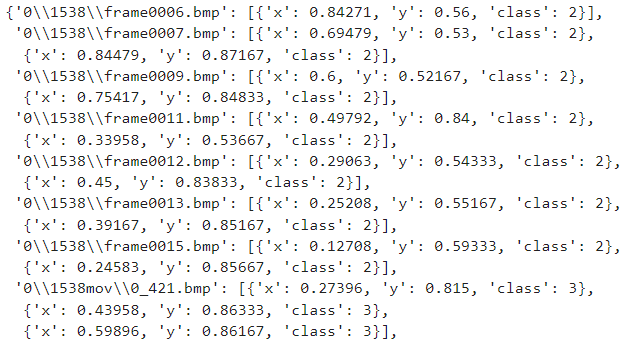

# Создание датасета для обучения модели
Для обучения модели данные необходимо представить в определённой иерархии, поэтому следующая функция создаёт данную иерархию
##### ВАЖНО! Папка для создания тренировочного датасета не должна иметь ограничений доступа

In [5]:
def fill_dir(path_to_initial_dataset,
             path_to_training_dataset,
             values,
             name):
    
    for file in values:
        try:
            from_ = path_to_initial_dataset + '\\' + file
            file_name = file.split('\\')[-1]
            to = f"{path_to_training_dataset}\\{name}\\images\\{file_name}"
            txt = f"{path_to_training_dataset}\\{name}\\labels\\{file_name.replace('.bmp', '.txt')}"
            
            shutil.copy(from_, to)
            
            with open(txt, 'w') as f:
                for obj in values[file]:
                    f.write(f"{obj['class']} {obj['x']} {obj['y']} {round(160 / 960, 5)} {round(160 / 600, 5)}\n")

        except FileNotFoundError:
            print(f'Файл {file} не существует, но присутствует в metadata')

def do_strucure(path_to_initial_dataset='DATASET\\FRAMES',
                path_to_training_dataset='Training_dataset'):
    
    os.mkdir(path_to_training_dataset)
    for path in '\\train', '\\train\\images', '\\train\\labels', '\\val', '\\val\\images', '\\val\\labels':
        os.mkdir(path_to_training_dataset + path)

    with open(f'{path_to_training_dataset}\\data.yaml', 'w') as f:
        f.write("""names:
  0: потертость
  1: черная точка
  2: плена
  3: маркер
  4: грязь
  5: накол
  6: н.д. накол
  7: микровыступ
  8: н.д. микровыступ
  9: вмятина
  10: мех.повреждение
  11: риска
  12: царапина с волчком
nc: 13\n""")

        f.write("train: " + os.path.abspath(f'{path_to_training_dataset}\\train\\images') + '\n')
        f.write("val: " + os.path.abspath(f'{path_to_training_dataset}\\val\\images'))

    fill_dir(path_to_initial_dataset,
             path_to_training_dataset,
             train,
             'train')
    
    fill_dir(path_to_initial_dataset,
             path_to_training_dataset,
             test,
             'val')

In [6]:
do_strucure()

Файл 0\потертость\frame0000.bmp не существует, но присутствует в metadata
Файл 2020.10.16\Труба 10\0_108.bmp не существует, но присутствует в metadata
Файл 2020.10.16\Труба 3\4_112.bmp не существует, но присутствует в metadata
Файл 2020.10.16\Труба 3\5_112.bmp не существует, но присутствует в metadata
Файл 2020.10.16\Труба 5\4_598.bmp не существует, но присутствует в metadata
Файл 2020.10.17\Труба 2\3_866.bmp не существует, но присутствует в metadata
Файл 2020.10.17\Труба 3\3_502.bmp не существует, но присутствует в metadata
Файл 2020.10.17\Труба 4\1_095.bmp не существует, но присутствует в metadata
Файл 2020.10.17\Труба 4\1_145.bmp не существует, но присутствует в metadata
Файл 2020.10.17\Труба 4\3_160.bmp не существует, но присутствует в metadata
Файл 2020.10.17\Труба 4\3_237.bmp не существует, но присутствует в metadata
Файл 2020.10.17\Труба 4\3_244.bmp не существует, но присутствует в metadata
Файл 2020.10.17\Труба 4\3_245.bmp не существует, но присутствует в metadata
Файл 2020.10.